In [1]:
#topic of research project: finding objects at distances around that of the sun in M31
#malhar dave

#we have to see the distance distribution of stars at a comparable distance from the centre of their galaxy to that of the sun 
#
from ReadFile import Read #imported read file
import numpy as np #importing numpy library
import astropy.units as u #importing astropy's unit library to get our answers with their units
import matplotlib.pyplot as plt
#from CenterOfMass2 import CenterOfMass
from CenterOfMass_Solution import CenterOfMass
#CORRECT FOR COM OF MILKY WAY 
#MAKE SURE TO HAVE COM AFTER X,Y,Z POSITION
#no need to have a for loop for an ARRAY
#np.where index 


MW COM xyz position: [-2.04  3.1  -1.47] kpc and xyz velocity: [ 0.33  4.37 -0.44] km / s
M31 COM xyz position: [-377.66  611.43 -284.64] kpc and xyz velocity: [ 0.33  4.37 -0.44] km / s
M33 COM xyz position: [-476.22  491.44 -412.4 ] kpc and xyz velocity: [ 44.42 101.78 142.23] km / s
Separation between the MW and M31 = 769.0 kpc
Relative Velocity between the MW and M31 = 116.0 km / s
Relative Position between M33 and M31 =  201.0 kpc
Relative Velocity between M33 and M31 =  199.0 km / s


In [2]:
def magd(a,b,c):
    d= np.sqrt(a**2+b**2+c**2) 
    return d
#below is a general function to show sun-like stars within a possible area
#note, we have to consider the trajectory at different snapshots or time period


Starting to Compute MW Orbit
Saving snapshot 0 of 800
Saving snapshot 5 of 800
Saving snapshot 10 of 800
Saving snapshot 15 of 800
Saving snapshot 20 of 800
Saving snapshot 25 of 800
Saving snapshot 30 of 800
Saving snapshot 35 of 800
Saving snapshot 40 of 800
Saving snapshot 45 of 800
Saving snapshot 50 of 800
Saving snapshot 55 of 800
Saving snapshot 60 of 800
Saving snapshot 65 of 800
Saving snapshot 70 of 800
Saving snapshot 75 of 800
Saving snapshot 80 of 800
Saving snapshot 85 of 800
Saving snapshot 90 of 800
Saving snapshot 95 of 800
Saving snapshot 100 of 800
Saving snapshot 105 of 800
Saving snapshot 110 of 800
Saving snapshot 115 of 800
Saving snapshot 120 of 800
Saving snapshot 125 of 800
Saving snapshot 130 of 800
Saving snapshot 135 of 800
Saving snapshot 140 of 800
Saving snapshot 145 of 800
Saving snapshot 150 of 800
Saving snapshot 155 of 800
Saving snapshot 160 of 800
Saving snapshot 165 of 800
Saving snapshot 170 of 800
Saving snapshot 175 of 800
Saving snapshot 180 o

Saving snapshot 710 of 800
Saving snapshot 715 of 800
Saving snapshot 720 of 800
Saving snapshot 725 of 800
Saving snapshot 730 of 800
Saving snapshot 735 of 800
Saving snapshot 740 of 800
Saving snapshot 745 of 800
Saving snapshot 750 of 800
Saving snapshot 755 of 800
Saving snapshot 760 of 800
Saving snapshot 765 of 800
Saving snapshot 770 of 800
Saving snapshot 775 of 800
Saving snapshot 780 of 800
Saving snapshot 785 of 800
Saving snapshot 790 of 800
Saving snapshot 795 of 800
Saving snapshot 800 of 800
Starting to Compute M33 Orbit
Saving snapshot 0 of 800
Saving snapshot 5 of 800
Saving snapshot 10 of 800
Saving snapshot 15 of 800
Saving snapshot 20 of 800
Saving snapshot 25 of 800
Saving snapshot 30 of 800
Saving snapshot 35 of 800
Saving snapshot 40 of 800
Saving snapshot 45 of 800
Saving snapshot 50 of 800
Saving snapshot 55 of 800
Saving snapshot 60 of 800
Saving snapshot 65 of 800
Saving snapshot 70 of 800
Saving snapshot 75 of 800
Saving snapshot 80 of 800
Saving snapshot 8

C:\Users\malha\OneDrive\Desktop\SPRING2023\ASTR400B\400B_2023_Dave\ResearchAssignments\ResearchAssignment5\OrbitCOM_Soln.py:333: RuntimeWarning: overflow encountered in exp
  exp_decay = lambda t, a, b, c : a * np.exp(-b * t) + c


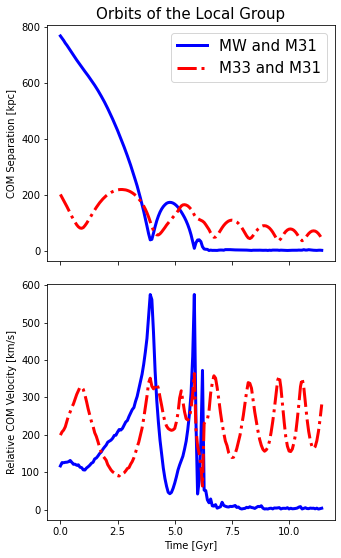

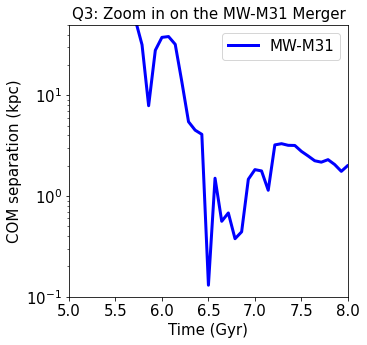

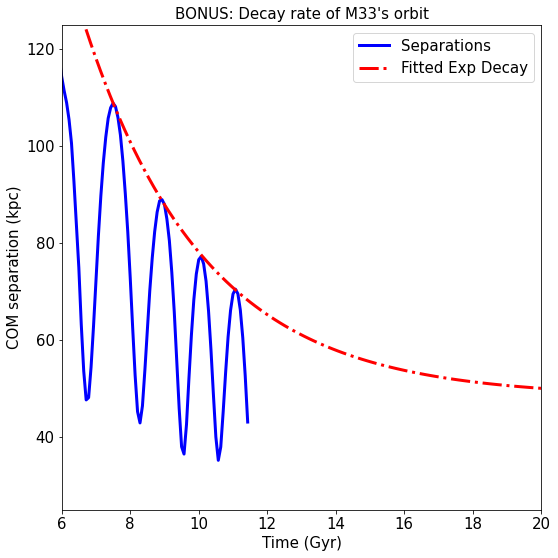

In [3]:
from OrbitCOM_Soln import orbitCOM #importing our function to have different snapshots 


In [4]:
#defining our sunlike star function 
#NOTE: THIS FUNCTION SEES THE OVERALL TREND OF ACCOUNTING FOR SUNLIKE STARS IN THE GALAXY AT DIFFERENT SNAPSHOTS, 
#TO GIVE A GENERAL OVERVIEW OF HOW MANY STARS CAN BE DEFINED AT ONE PARTICULAR SNAPSHOT

"""Inputs:

filename : [STRING] file containing the simulation datA
particle_type :[int] the type of particle to consider, in our case, it is 2 by default
snap_num: [int] the snapshot number to consider.

Outputs:

total_distance[sunlike]: the distance from the center of mass of the galaxy for sunlike particles
x[sunlike] : the x-coordinate of the position relative to COM
y[sunlike] : the y-coordinate of the position relative to COM
z[sunlike] : the y-coordinate of the position relative to COM"""
def sunlike_stars(filename, particle_type, snap_num):
    snap_str = str(snap_num).zfill(3) #to have our function be in line with formatting of snapstr
    file = Read(filename.replace("000", snap_str)) #to have same format as unzipped files 
    t, N, data = Read(filename.replace("000", snap_str))#replacing default format with the specificed snap string 

    index = np.where(data['type'] == particle_type) #specifying particle type

    M31_COM = CenterOfMass(filename.replace("000", snap_str), 2) #to read in specific snapshot
    M31_COM_p = M31_COM.COM_P(0.1).value  #position for given centre of mass 

    x = data['x'][index] - M31_COM_p[0] #x position, after considering COM
    y = data['y'][index] - M31_COM_p[1] #y position, after considering COM
    z = data['z'][index] - M31_COM_p[2] #z position, after considering COM
   
    total_distance = np.sqrt(x**2 + y**2 + z**2) #total magnitude 
    
    # target distance of the sun in kpc  
    sun_distance = 8.29
    
    distance_from_COM = np.abs(total_distance) #distance from the centre of the milky way
    
    # finding out a comparable star at the distance of the sun
    difference_distance = np.abs(distance_from_COM - sun_distance)
    
    sunlike = np.where(difference_distance <= 0.1)[0] #setting our criteria for sunlike stars
            
    return total_distance[sunlike], x[sunlike], y[sunlike], z[sunlike]

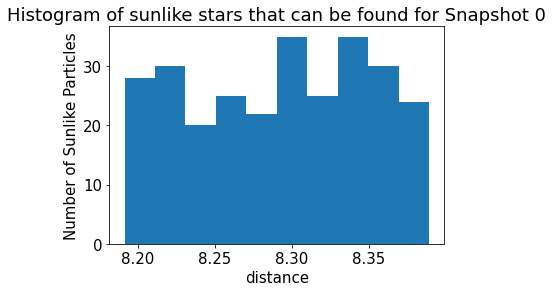

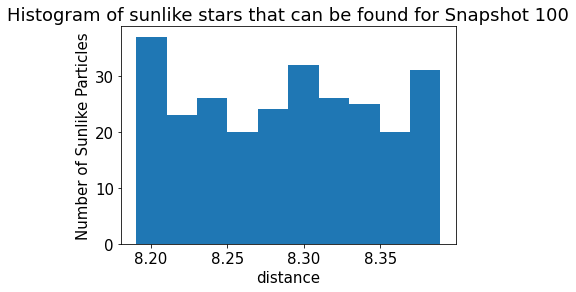

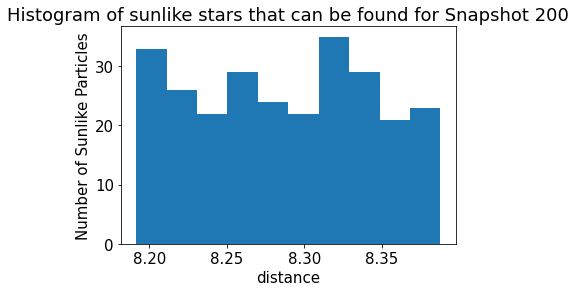

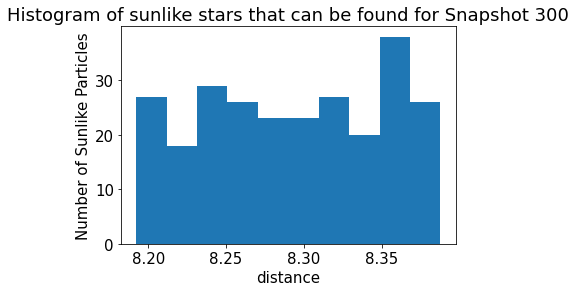

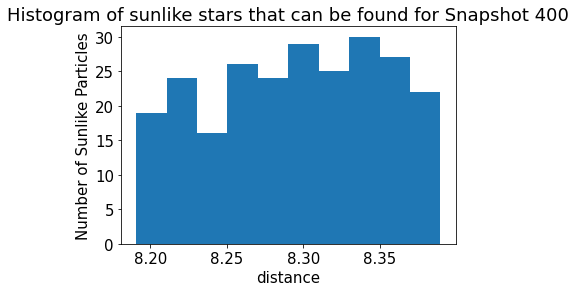

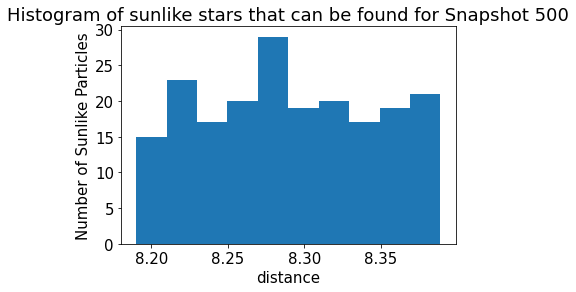

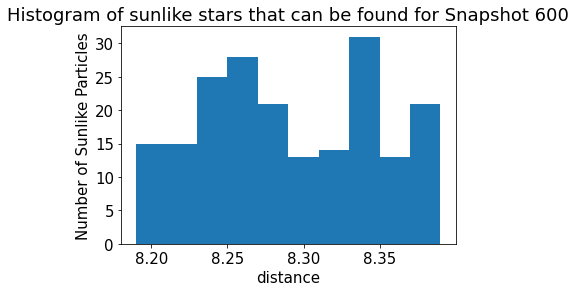

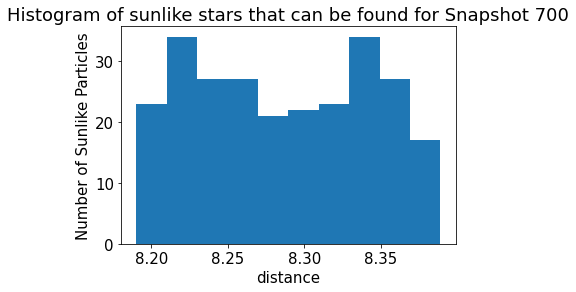

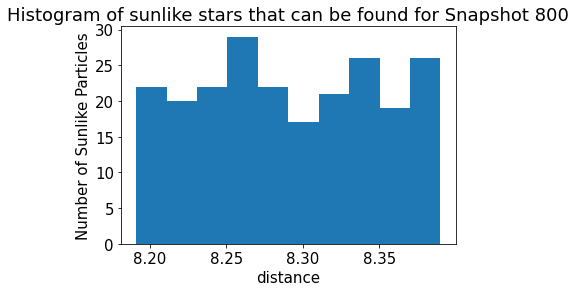

In [5]:
snap_nums = [0, 100, 200, 300, 400,500,600,700,800]  # snapshot numbers to plo
particle_type = 2  # type of particle to consider
for snap_num in snap_nums:
    distances, x, y, z = sunlike_stars("MW_000.txt", particle_type, snap_num) #calling our function 
    magnitude=np.sqrt(x**2+y**2+z**2) 
    plt.hist(magnitude, bins=10)
    plt.title(f"Histogram of sunlike stars that can be found for Snapshot {snap_num}")
    plt.xlabel("distance")
    plt.ylabel("Number of Sunlike Particles")
    plt.show()

In [6]:
#defining our sunlike star function 
#NOTE: THIS FUNCTION SEES THE OVERALL TREND OF SUNLIKE STARS AT DIFFERENT SNAPSHOTS AFTER SNAPSHOT 0 
#AND THEIR GENERAL DISTANCE DISTRIBUTION
"""Inputs:

filename : [STRING] file containing the simulation datA
particle_type :[int] the type of particle to consider, in our case, it is 2 by default
snap_num: [int] the snapshot number to consider.

Outputs:

sunlike_indices: the index of the particles which fit the criteria of sunlike particles
"""
def sunlike_stars2(filename, particle_type, snap_num):
    snap_str = str(snap_num).zfill(3) #to have our function be in line with formatting of snapstr
    file = Read(filename.replace("000", snap_str)) #to have same format as unzipped files 
    t, N, data = Read(filename.replace("000", snap_str)) #replacing default format with the specificed snap string

    index = np.where(data['type'] == particle_type)

    M31_COM = CenterOfMass(filename.replace("000", snap_str), 2) #to read in specific snapshot
    M31_COM_p = M31_COM.COM_P(0.1).value  #specifying particle type

    x = data['x'][index] - M31_COM_p[0] #x position, after considering COM
    y = data['y'][index] - M31_COM_p[1] #y position, after considering COM
    z = data['z'][index] - M31_COM_p[2] #x position, after considering COM
   
    total_distance = np.sqrt(x**2 + y**2 + z**2)
    
    # target distance of the sun in kpc  
    sun_distance = 8.29
    
    distance_from_COM = np.abs(total_distance)
    
    # finding out a comparable star at the distance of the sun
    difference_distance = np.abs(distance_from_COM - sun_distance)
    
    sunlike = np.where(difference_distance <= 0.1)[0]
    sunlike_indices = index[0][sunlike]       
    return sunlike_indices


25092 : 8.280457492741569 kpc
25199 : 8.252788747508324 kpc
25436 : 8.267625348892691 kpc
25628 : 8.191463812909141 kpc
25867 : 8.308365558430905 kpc
25947 : 8.209800651978341 kpc
26555 : 8.333715704017086 kpc
26637 : 8.250878161559532 kpc
26659 : 8.211326452555884 kpc
26789 : 8.205458596775685 kpc
27115 : 8.228505446203458 kpc
27185 : 8.209908129358087 kpc
27329 : 8.243817402966238 kpc
27884 : 8.38437943200026 kpc
27915 : 8.38005070899932 kpc
28102 : 8.368466968859948 kpc
28219 : 8.352449979963962 kpc
28305 : 8.199422991794544 kpc
28335 : 8.237044884720492 kpc
28353 : 8.338452703073875 kpc
28429 : 8.245084189800611 kpc
28500 : 8.382571881618434 kpc
28679 : 8.24414161877997 kpc
28694 : 8.217116484661759 kpc
28765 : 8.226291123623087 kpc
29031 : 8.272590069002636 kpc
29103 : 8.366717788011258 kpc
29118 : 8.376590648539537 kpc
29145 : 8.298520513947048 kpc
29197 : 8.269809323031579 kpc
29832 : 8.286256223198748 kpc
30135 : 8.252902453912805 kpc
30164 : 8.20351877967016 kpc
30327 : 8.2303

25092 : 29.63707128517425 kpc
25199 : 1.630936675656059 kpc
25436 : 0.6566948758746015 kpc
25628 : 5.027608728809384 kpc
25867 : 9.314528106672935 kpc
25947 : 0.3862408574969955 kpc
26555 : 6.135487163216923 kpc
26637 : 2.2958956966726487 kpc
26659 : 22.20898270385206 kpc
26789 : 17.833168859459622 kpc
27115 : 4.460631180673856 kpc
27185 : 3.3002531190804136 kpc
27329 : 2.203937612547142 kpc
27884 : 3.6477444482858186 kpc
27915 : 37.42765812136796 kpc
28102 : 1.0975619754710881 kpc
28219 : 2.3912465389415645 kpc
28305 : 7.9346810603829345 kpc
28335 : 9.70189890897651 kpc
28353 : 21.52118149870031 kpc
28429 : 1.9080190381649542 kpc
28500 : 0.7738523761028198 kpc
28679 : 9.57166155743086 kpc
28694 : 1.7845478250806202 kpc
28765 : 13.815712232454755 kpc
29031 : 0.9966378178656505 kpc
29103 : 9.999293513043805 kpc
29118 : 3.853596861375068 kpc
29145 : 1.0905781815165836 kpc
29197 : 1.031733226178153 kpc
29832 : 32.38210577989024 kpc
30135 : 1.0433255340496563 kpc
30164 : 2.1914083964428164

25092 : 12.087986037798029 kpc
25199 : 92.17841520844237 kpc
25436 : 0.6247001280614659 kpc
25628 : 13.729327689293447 kpc
25867 : 27.489118077886747 kpc
25947 : 2.75008941854624 kpc
26555 : 14.066446957209907 kpc
26637 : 41.84688392485157 kpc
26659 : 36.92463569231253 kpc
26789 : 8.125331519390459 kpc
27115 : 11.059057868100702 kpc
27185 : 30.59677590727493 kpc
27329 : 1.9445489554135713 kpc
27884 : 0.5094497521836724 kpc
27915 : 61.18394631510787 kpc
28102 : 8.793592060699652 kpc
28219 : 6.190255172446448 kpc
28305 : 58.12690113931759 kpc
28335 : 13.941471800351646 kpc
28353 : 1.5475935674459247 kpc
28429 : 24.577264254794517 kpc
28500 : 17.7248207621403 kpc
28679 : 2.0120901619957277 kpc
28694 : 26.045081248289478 kpc
28765 : 2.8141506285200766 kpc
29031 : 46.8592292238146 kpc
29103 : 45.95589300720855 kpc
29118 : 11.406677652147447 kpc
29145 : 38.174519989778524 kpc
29197 : 51.759683699873015 kpc
29832 : 74.65794193379564 kpc
30135 : 42.129020385596434 kpc
30164 : 52.30558838804894

25092 : 13.886017249017101 kpc
25199 : 82.91200469172121 kpc
25436 : 5.830201102020414 kpc
25628 : 1.6617881212717822 kpc
25867 : 18.57898999434577 kpc
25947 : 1.0060373949312158 kpc
26555 : 24.93156339442033 kpc
26637 : 1.3570325567207315 kpc
26659 : 8.796848071894836 kpc
26789 : 5.958591877281077 kpc
27115 : 3.223795807739694 kpc
27185 : 2.68789017818809 kpc
27329 : 11.368595577730787 kpc
27884 : 21.66870462787289 kpc
27915 : 10.544486343582603 kpc
28102 : 3.6292373317268747 kpc
28219 : 4.4308627387902675 kpc
28305 : 0.5300943689570823 kpc
28335 : 37.04919941388747 kpc
28353 : 38.096533451220985 kpc
28429 : 1.638822043420216 kpc
28500 : 35.92470292166659 kpc
28679 : 12.881343231200686 kpc
28694 : 10.092861527337028 kpc
28765 : 3.372934425689319 kpc
29031 : 9.02962769775144 kpc
29103 : 26.502992924573608 kpc
29118 : 24.65069000332444 kpc
29145 : 52.81832595084778 kpc
29197 : 4.436173910026538 kpc
29832 : 44.95219526341288 kpc
30135 : 6.834854035749393 kpc
30164 : 1.9186561051944744 kp

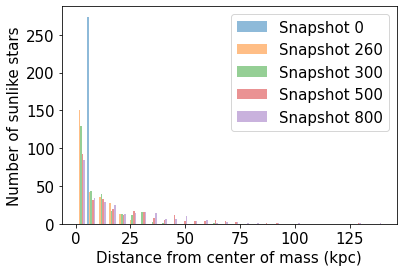

In [14]:

snap_nums = [0,260,300,500,800] # snapshot numbers to loop over
sunlikestars0 = sunlike_stars2("MW_000.txt", 2, 0) #indices of sunlike stars in snapshot 0

distances = [] #creating an empty list for distances 

for snap_num in snap_nums: #initiating a for loop 
    snap_str = str(snap_num).zfill(3) #filling in the designated snapstring
    t, N, data = Read("MW_" + snap_str + ".txt") #reading in the t,N,data values for given snapshot 
    
    M31_COM = CenterOfMass("MW_" + snap_str + ".txt", 2) #calculating centre of mass for given snapshot by calling 
    #function from homework 5 
    M31_COM_p = M31_COM.COM_P(0.1).value  #position of given centre of mass 
    
    x = data['x'][sunlikestars0] - M31_COM_p[0] #x position of sunlike stars at given snapshot
    y = data['y'][sunlikestars0] - M31_COM_p[1] #y position of sunlike stars at given snapshot
    z = data['z'][sunlikestars0] - M31_COM_p[2] #z position of sunlike stars at given snapshot
    
    total_distance = np.sqrt(x**2 + y**2 + z**2) #total magnitude
    distances.append(total_distance) #appending total distance in loop to create total distance dataset for all particles
    
    for i, distance in enumerate(total_distance): #enumerate allows us bypass incrementing the dataset.
        print(str(sunlikestars0[i]) + " : " + str(distance) + " kpc") #printed distance at given snapshot
#histogram containing all specified snapshots
plt.hist(distances, bins=30, alpha=0.5, label=[f"Snapshot {snap_num}" for snap_num in snap_nums])
plt.xlabel("Distance from center of mass (kpc)")
plt.ylabel("Number of sunlike stars")
plt.legend()
plt.show()

Number of sunlike particles:  274
Snapshot 000:


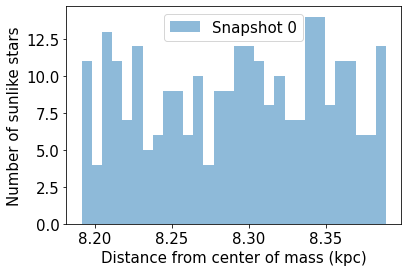

Snapshot 200:


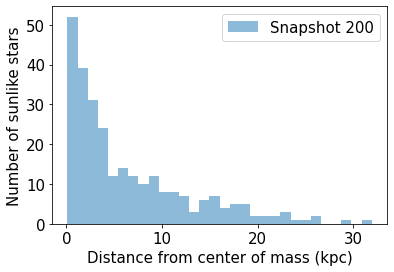

Snapshot 260:


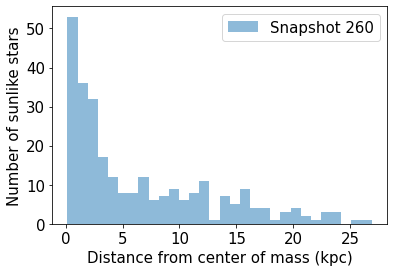

Snapshot 300:


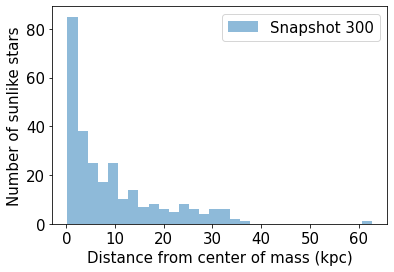

Snapshot 500:


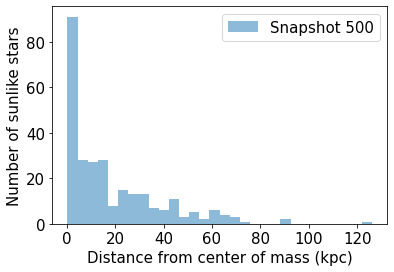

Snapshot 550:


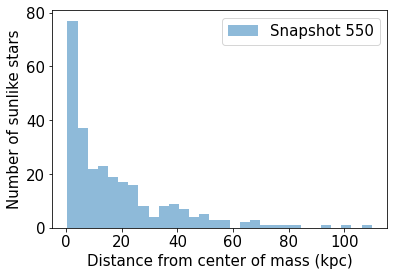

Snapshot 800:


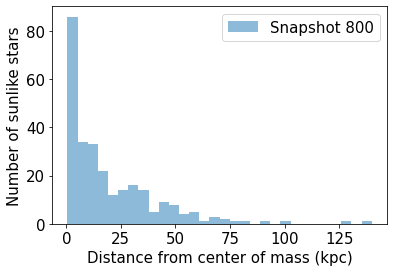

In [13]:
#below code is the same as the above code but the hist function is within the loop, to get individual histograms 
#for each snapshot

snap_nums = [0,200,260,300,500,550,800] # snapshot numbers to loop over
sunlikestars0 = sunlike_stars2("MW_000.txt", 2, 0) #indices of sunlike stars in snapshot 0
print("Number of sunlike particles: ",len(sunlikestars0))
for snap_num in snap_nums:
    snap_str = str(snap_num).zfill(3)
    t, N, data = Read("MW_" + snap_str + ".txt")
    
    M31_COM = CenterOfMass("MW_" + snap_str + ".txt", 2)
    M31_COM_p = M31_COM.COM_P(0.1).value
    
    x = data['x'][sunlikestars0] - M31_COM_p[0]
    y = data['y'][sunlikestars0] - M31_COM_p[1]
    z = data['z'][sunlikestars0] - M31_COM_p[2]
    
    total_distance = np.sqrt(x**2 + y**2 + z**2)
    
    print("Snapshot " + snap_str + ":")
    for i, distance in enumerate(total_distance):
        (str(sunlikestars0[i]) + " : " + str(distance) + " kpc")
    plt.hist(total_distance, bins=30, alpha=0.5, label=f"Snapshot {snap_num}")
    plt.xlabel("Distance from center of mass (kpc)")
    plt.ylabel("Number of sunlike stars")
    plt.legend()
    plt.show()